<a href="https://colab.research.google.com/github/AndrewCrossman/Research/blob/main/Find_Lattice_Energy_from_BLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Helper Functions and Values

In [ ]:
# Dictionary that holds {nanosphere radius : atoms in sphere} given a Au Lattice Parameter
AtomsPerSize = {10:249,20:1985, 25:3925, 30:6699,40:15711,50:30885,60:53117,70:84859,80:126341,90:180313,100:246861}

## This section finds the energy of a nanoparticle from its BLD

In [ ]:
file = "https://raw.githubusercontent.com/AndrewCrossman/Research/main/MC_Sphere100_Au_onAu_r30_1000Cycles/MC_Sphere100_Au_r30_BLDr25.bld"

In [ ]:
data = pd.read_csv(file,header=None,delimiter=' ')
data

,0,1,2,3,4
0,NaN,NaN,1.0000,NaN,0.0
1,NaN,NaN,1.0300,NaN,0.0
2,NaN,NaN,1.0599,NaN,0.0
3,NaN,NaN,1.0899,NaN,0.0
4,NaN,NaN,1.1199,NaN,0.0
...,...,...,...,...,...
796,NaN,NaN,24.8500,NaN,27342.0
797,NaN,NaN,24.8800,NaN,30344.0
798,NaN,NaN,24.9100,NaN,34252.0
799,NaN,NaN,24.9400,NaN,38868.0


In [ ]:
data.iloc[:,2]
data.iloc[:,4]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
796    27342.0
797    30344.0
798    34252.0
799    38868.0
800    43522.0
Name: 4, Length: 801, dtype: float64

In [ ]:
Energy = 0
E = 5.29/(6.0221408*10**23)*2.611*10**22    # kcal/mole converted to eV/atom
r0 = 2.951      # angstroms
A = E*r0**12    # E*r0^12 in (kcal * angstrom^12) per mole
B = 2*E*r0**6   #6987    # 2*E*r0^6 in (kcal * angstrom^6) per mole
lp = 4.078900 # lattice parameter

for i in np.arange(len(data.iloc[:,2])):
  dist = data.iloc[:,2][i]
  d3 = dist*dist*dist
  d6 = d3*d3
  d12= d6*d6
  Energy = Energy + (A/d12 - B/d6)*data.iloc[:,4][i]
Energy = Energy/2

In [ ]:
Energy/6699

-1.7027095039725435

## Energy per Atom vs Nanosphere Size (BLD interaction distance of 13 Å)

In [ ]:
# Lennard-Jones Energy of lattices as a function of the radius of the sphere
# with the BLD reaching out to 13 angstroms
sizes = [10,20,30,40,50,60,70,80,90,100]
atoms = [249,1985,6699,15711,30885,53117,84859,126341,180313,246861]
energies = [-1.3637823440784378,-1.610121350907847,-1.6956711165798894,-1.7373922221764095,-1.7635292116815366,
            -1.7832508724365899,-1.8109058637491857,-1.8105379755074056,-1.8196450789909768,
            -1.8273659727222047]
# Lennard-Jones Energy of lattices as a function of the radius of the sphere
# with the BLD reaching out to 25 angstroms
sizes25 = [100]
atoms25 = [246861]
energies25 = [-1.839502671288224]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

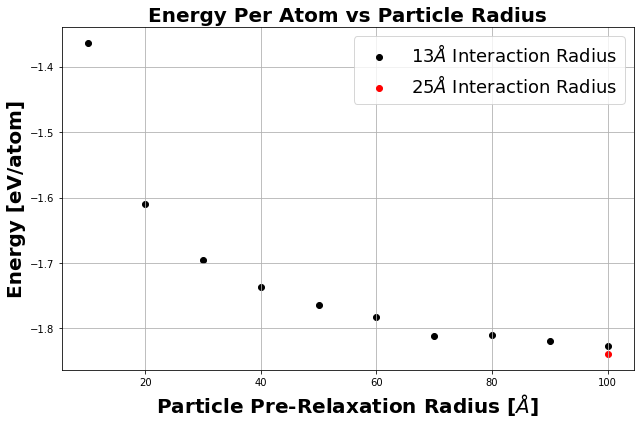

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(sizes,energies, color='black', label=r'$13\AA$'+' Interaction Radius')
ax.scatter(sizes25,energies25, color='red', label=r'$25\AA$'+' Interaction Radius')
ax.set_title(r'Energy Per Atom vs Particle Radius', fontsize=20, fontweight='bold')
ax.set_xlabel(r'Particle Pre-Relaxation Radius [$\AA$]', fontsize=20, fontweight='bold')
ax.set_ylabel(r'Energy [eV/atom]', fontsize=20, fontweight='bold')
ax.legend(fontsize=18)
ax.grid()
plt.tight_layout()
plt.savefig('EnergyPerAtom.png')
files.download('EnergyPerAtom.png')

In [ ]:
atoms = [1/(x**(1/3)) for x in atoms]
atoms25 = [1/(x**(1/3)) for x in atoms25]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

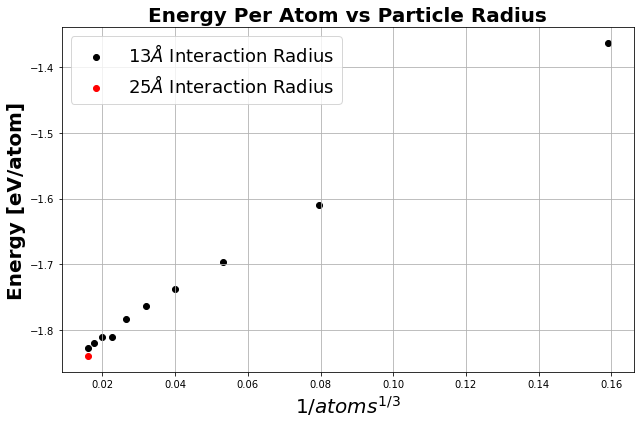

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(atoms,energies, color='black', label=r'$13\AA$'+' Interaction Radius')
ax.scatter(atoms25,energies25, color='red', label=r'$25\AA$'+' Interaction Radius')
ax.set_title(r'Energy Per Atom vs Particle Radius', fontsize=20, fontweight='bold')
ax.set_xlabel(r'$1/atoms^{1/3}$', fontsize=20, fontweight='bold')
ax.set_ylabel(r'Energy [eV/atom]', fontsize=20, fontweight='bold')
ax.legend(fontsize=18)
ax.grid()
plt.tight_layout()
plt.savefig('EnergyPerAtomv2.png')
files.download('EnergyPerAtomv2.png')

## Energy per Atom vs BLD Interaction Distance for 30Å and 40Å radius sphere

In [ ]:
interaction_distance = [5,10,15,20,25]
energiesr40 = [-1.4459350055851707, -1.7208837425672021, -1.7409963963173123, -1.7448910563251787, -1.7454857044705943]
energiesr30 = [-1.4163016043906735, -1.6805702445350428, -1.698971110615917, -1.7021117499758796,-1.7027095039725435]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

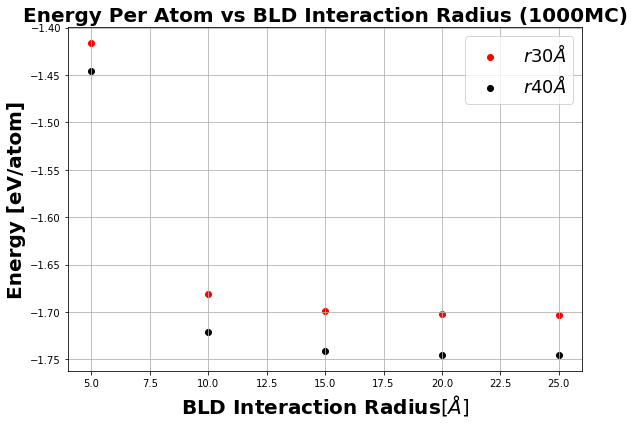

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(interaction_distance,energiesr30, color='red', label=r'$r30\AA$')
ax.scatter(interaction_distance,energiesr40, color='black', label=r'$r40\AA$')
ax.set_title(r'Energy Per Atom vs BLD Interaction Radius (1000MC)', fontsize=20, fontweight='bold')
ax.set_xlabel("BLD Interaction Radius"+r'$[\AA]$', fontsize=20, fontweight='bold')
ax.set_ylabel(r'Energy [eV/atom]', fontsize=20, fontweight='bold')
ax.legend(fontsize=18)
ax.grid()
plt.tight_layout()
plt.savefig('EnergyPerAtomVBLD.png')
files.download('EnergyPerAtomVBLD.png')

## Bimetallic Energy per Atom from BLDs


Find the energy per atom for a bimetallic structure from its 3 BLD files

In [ ]:
file1 = "https://raw.githubusercontent.com/AndrewCrossman/Research/main/Tests/MC_Coreshell5050_NiAu_onAu_r25_2000Cycles/2000_AuAu.bld"
file2 = "https://raw.githubusercontent.com/AndrewCrossman/Research/main/Tests/MC_Coreshell5050_NiAu_onAu_r25_2000Cycles/2000_AuNi.bld"
file3 = "https://raw.githubusercontent.com/AndrewCrossman/Research/main/Tests/MC_Coreshell5050_NiAu_onAu_r25_2000Cycles/2000_NiNi.bld"

In [ ]:
data1 = pd.read_csv(file1,header=None,delimiter=' ')
data2 = pd.read_csv(file2,header=None,delimiter=' ')
data3 = pd.read_csv(file3,header=None,delimiter=' ')

In [ ]:
Energy_1 = 0
Energy_2 = 0
Energy_3 = 0
lp = 4.078900 # lattice parameter
# Au-Au interactions
E_1 = 5.29/(6.0221408*10**23)*2.611*10**22    # kcal/mole converted to eV/atom
r0_1 = 2.951                        # angstroms
A_1 = E_1*r0_1**12                  # E*r0^12 in (kcal * angstrom^12) per mole
B_1 = 2*E_1*r0_1**6                 # 2*E*r0^6 in (kcal * angstrom^6) per mole
# Ni-Ni interactions
E_2 = 5.65/(6.0221408*10**23)*2.611*10**22    # kcal/mole converted to eV/atom
r0_2 = 2.552                        # angstroms
A_2 = E_2*r0_2**12                  # E*r0^12 in (kcal * angstrom^12) per mole
B_2 = 2*E_2*r0_2**6                 # 2*E*r0^6 in (kcal * angstrom^6) per mole
# Pd-Pd interactions
E_2 = 6.15/(6.0221408*10**23)*2.611*10**22    # kcal/mole converted to eV/atom
r0_2 = 2.819                        # angstroms
A_2 = E_2*r0_2**12                  # E*r0^12 in (kcal * angstrom^12) per mole
B_2 = 2*E_2*r0_2**6                 # 2*E*r0^6 in (kcal * angstrom^6) per mole
# Au-Ni interactions
E_3 = 5.47/(6.0221408*10**23)*2.611*10**22    # kcal/mole converted to eV/atom
r0_3 = 2.751                        # angstroms
A_3 = E_3*r0_3**12                  # E*r0^12 in (kcal * angstrom^12) per mole
B_3 = 2*E_3*r0_3**6                 # 2*E*r0^6 in (kcal * angstrom^6) per mole
# Au-Pd interactions
E_3 = 5.72/(6.0221408*10**23)*2.611*10**22    # kcal/mole converted to eV/atom
r0_3 = 2.885                        # angstroms
A_3 = E_2*r0_2**12                  # E*r0^12 in (kcal * angstrom^12) per mole
B_3 = 2*E_2*r0_2**6                 # 2*E*r0^6 in (kcal * angstrom^6) per mole

for i in np.arange(len(data1.iloc[:,2])):
  # BLD file 1 energy Summation
  dist1 = data1.iloc[:,2][i]
  d3_1 = dist1*dist1*dist1
  d6_1 = d3_1*d3_1
  d12_1= d6_1*d6_1
  Energy_1 = Energy_1 + (A_1/d12_1 - B_1/d6_1)*data1.iloc[:,4][i]
  # BLD file 2 energy Summation
  dist2 = data2.iloc[:,2][i]
  d3_2 = dist2*dist2*dist2
  d6_2 = d3_2*d3_2
  d12_2= d6_2*d6_2
  Energy_2 = Energy_2 + (A_2/d12_2 - B_2/d6_2)*data2.iloc[:,4][i]
  # BLD file 3 energy Summation
  dist3 = data3.iloc[:,2][i]
  d3_3 = dist3*dist3*dist3
  d6_3 = d3_3*d3_3
  d12_3= d6_3*d6_3
  Energy_3 = Energy_3 + (A_3/d12_3 - B_3/d6_3)*data3.iloc[:,4][i]

Energy_1 = Energy_1/2
Energy_2 = Energy_2/2
Energy_3 = Energy_3/2

In [ ]:
Total_Energy = (Energy_1 + Energy_2 + Energy_3)/AtomsPerSize[25]
Total_Energy

-1.20084777482951

In [ ]:
ParticleType = ["AuPd5050Sphere","PdAu5050CoreShell","AuPd5050CoreShell","AuNi5050Sphere","PdAu5050CoreShell","AuPd5050CoreShell", 'AuNi5050CoreShell', 'NiAu5050CoreShell']
energies = [-1.3642571147219362,-1.6835468184302902,-1.642410778866962,-1.276278288457203,-1.6835468184302902,-1.642410778866962,-1.3690416419602451,-1.20084777482951]
ParticleTypeEnergy = {'AuPd5050Sphere':-1.3642571147219362,'AuNi5050Sphere':-1.276278288457203,'PdAu5050CoreShell':-1.6835468184302902,'AuPd5050CoreShell':-1.642410778866962,
                      'AuNi5050CoreShell':-1.3690416419602451, 'NiAu5050CoreShell':-1.20084777482951}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

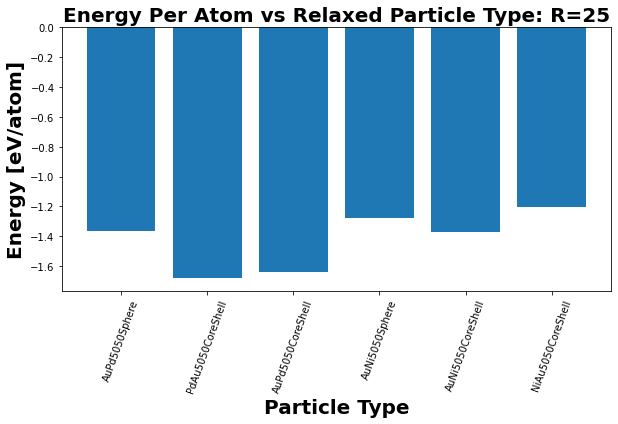

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))
#ax.scatter(ParticleType,energies)
ax.bar(ParticleType,energies)
ax.set_title(r'Energy Per Atom vs Relaxed Particle Type: R=25', fontsize=20, fontweight='bold')
ax.set_xlabel(r'Particle Type', fontsize=20, fontweight='bold')
ax.set_ylabel(r'Energy [eV/atom]', fontsize=20, fontweight='bold')
ax.tick_params(axis='x',labelsize=10, labelrotation=70)
#ax.legend(fontsize=18)
#ax.grid()
plt.tight_layout()
plt.savefig('EnergyPerAtomVParticleType.png')
files.download('EnergyPerAtomVParticleType.png')